In [226]:
# note: using Tensorflow version 1.15
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## Problem 1

In [330]:
#Load data
# https://keras.io/datasets/
# https://keras.io/preprocessing/sequence/

# issues with pickle: https://stackoverflow.com/questions/55890813/how-to-fix-object-arrays-cannot-be-loaded-when-allow-pickle-false-for-imdb-loa/56243777
np_load_old = np.load # save np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k) # modify the default parameters of np.load

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

np.load = np_load_old # restore np.load for future normal usage

# pad the data
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
x_test =  keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [331]:
print(x_train.shape)

(25000, 500)


In [334]:
# Build a Network

def build_model(vector_length, hidden_states):
    model = Sequential()
    
    #Embedding layer
    # https://keras.io/layers/embeddings/
    model.add(Embedding(input_dim=5000, output_dim=vector_length, input_length = 500))
    
    #LSTM layer
    # https://keras.io/examples/conv_lstm/
    # https://keras.io/layers/recurrent/
    model.add(LSTM(units = hidden_states))

    #Output layer
    model.add(Dense(1, activation='sigmoid')) 

    #Adam optimizer, crossentropy as loss function
    model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])
    return model

# Kept getting error messages without this line
import keras.backend as K
K.clear_session()

# #Test it's running properly
# model = build_model(vector_length=8, hidden_states=16) 

# results = model.fit(x_train, y_train, 
#                         epochs=2, 
#                         verbose=1)


# score = model.evaluate(x_test, y_test, verbose=0)


In [333]:
vector_length = np.array([8,16,32])
hidden_states = np.array([16,32,64,128])

testing_accuracy = np.zeros([4,5])
testing_accuracy[1:4,0] = vector_length
testing_accuracy[0,1:5] = hidden_states

print(testing_accuracy)

epochs = 10

for i in range(3):
    for j in range(4):
        K.clear_session()
        
        model = build_model(vector_length[i], hidden_states[j]) 

        results = model.fit(x_train, y_train, 
                            epochs=epochs, 
                            verbose=1)

        score = model.evaluate(x_test, y_test, verbose=0)
        
        testing_accuracy[i+1,j+1] = score[1]

        print(testing_accuracy)

[[  0.  16.  32.  64. 128.]
 [  8.   0.   0.   0.   0.]
 [ 16.   0.   0.   0.   0.]
 [ 32.   0.   0.   0.   0.]]
Epoch 1/10
25000/25000 [==============================] - 217s 9ms/step - loss: 0.4523 - acc: 0.7801
Epoch 2/10
25000/25000 [==============================] - 211s 8ms/step - loss: 0.2822 - acc: 0.8894
Epoch 3/10
25000/25000 [==============================] - 211s 8ms/step - loss: 0.2396 - acc: 0.9091
Epoch 4/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.2116 - acc: 0.9209
Epoch 5/10
25000/25000 [==============================] - 215s 9ms/step - loss: 0.1930 - acc: 0.9285
Epoch 6/10
25000/25000 [==============================] - 220s 9ms/step - loss: 0.1775 - acc: 0.9334
Epoch 7/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.1658 - acc: 0.9382
Epoch 8/10
25000/25000 [==============================] - 215s 9ms/step - loss: 0.1548 - acc: 0.9435
Epoch 9/10
25000/25000 [==============================] - 216s 9ms/step - loss:

25000/25000 [==============================] - 249s 10ms/step - loss: 0.1577 - acc: 0.9401
Epoch 9/10
25000/25000 [==============================] - 249s 10ms/step - loss: 0.1262 - acc: 0.9529
Epoch 10/10
25000/25000 [==============================] - 249s 10ms/step - loss: 0.1192 - acc: 0.9570
[[  0.       16.       32.       64.      128.     ]
 [  8.        0.85628   0.86432   0.85848   0.86516]
 [ 16.        0.86448   0.86448   0.69164   0.     ]
 [ 32.        0.        0.        0.        0.     ]]
Epoch 1/10
25000/25000 [==============================] - 289s 12ms/step - loss: 0.4941 - acc: 0.7592
Epoch 2/10
25000/25000 [==============================] - 289s 12ms/step - loss: 0.3421 - acc: 0.8599
Epoch 3/10
25000/25000 [==============================] - 299s 12ms/step - loss: 0.3014 - acc: 0.8767
Epoch 4/10
25000/25000 [==============================] - 299s 12ms/step - loss: 0.2688 - acc: 0.8933
Epoch 5/10
25000/25000 [==============================] - 300s 12ms/step - loss: 0.

In [335]:
K.clear_session()
        
model = build_model(16, 64) 

results = model.fit(x_train, y_train, 
                            epochs=10, 
                            verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)
        

print(score[1])

Epoch 1/10
25000/25000 [==============================] - 264s 11ms/step - loss: 0.4639 - acc: 0.7760
Epoch 2/10
25000/25000 [==============================] - 262s 10ms/step - loss: 0.3159 - acc: 0.8727
Epoch 3/10
25000/25000 [==============================] - 261s 10ms/step - loss: 0.2902 - acc: 0.8832
Epoch 4/10
25000/25000 [==============================] - 258s 10ms/step - loss: 0.2556 - acc: 0.9016
Epoch 5/10
25000/25000 [==============================] - 257s 10ms/step - loss: 0.2167 - acc: 0.9176
Epoch 6/10
25000/25000 [==============================] - 256s 10ms/step - loss: 0.1962 - acc: 0.9248
Epoch 7/10
25000/25000 [==============================] - 256s 10ms/step - loss: 0.1803 - acc: 0.9322
Epoch 8/10
25000/25000 [==============================] - 256s 10ms/step - loss: 0.1598 - acc: 0.9409
Epoch 9/10
25000/25000 [==============================] - 256s 10ms/step - loss: 0.1292 - acc: 0.9549
Epoch 10/10
25000/25000 [==============================] - 255s 10ms/step - loss: 

# Problem 2

In [337]:
#import data
data = loadmat('Pima-Data-Adjusted.mat')['data']
print(data.shape)

labels = data[:,8]
data = data[:,0:8]

# Make a tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Tune hyperparameters (i.e. number of leaves and layers)
def cross_validation(num, max_depth, min_samples_split):
    testing_accuracy = np.zeros(num)
    training_accuracy = np.zeros(num)
    for k in range(num):
        x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.3)

        model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split)

        model.fit(x_train, y_train)

        test_predictions = model.predict(x_val)
        testing_accuracy[k] = accuracy_score(y_val, test_predictions)
        
        train_predictions = model.predict(x_train)
        training_accuracy[k] = accuracy_score(y_train, train_predictions)
    return 1-np.mean(testing_accuracy), 1-np.mean(training_accuracy)

#Test it's working
cross_validation(5, 8, 8)

test_error = np.zeros((9,25))
train_error = np.zeros((9,25))
for max_depth in range(1,9):
    for node_size in range(2,25):
        test_error[max_depth, node_size], train_error[max_depth, node_size] = cross_validation(5, max_depth, node_size)
#print(test_error)


(537, 9)


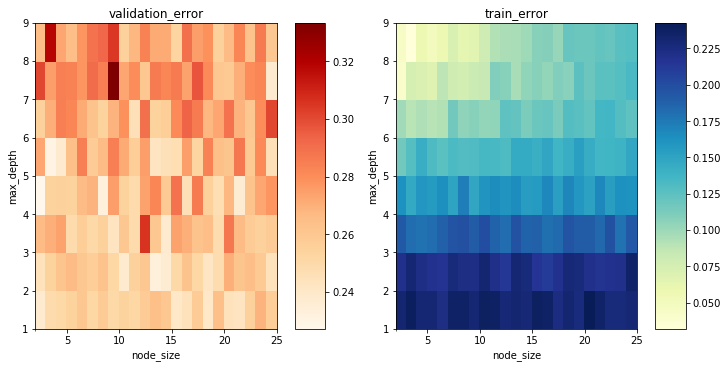

In [338]:
def plot_errors(test_error, training_error):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    print(axs)
    for [ax, cmap, data] in zip(axs,[cm.get_cmap('OrRd'), cm.get_cmap('YlGnBu')], [test_error, training_error]):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=np.amin(data[1:9,2:25]), vmax=np.amax(data[1:9,2:25]))
        fig.colorbar(psm, ax=ax)
        ax.set_xticks([2,25],1.5);
        ax.set_yticks([1,9],1.5);
        ax.set_xlabel('node_size');
        ax.set_ylabel('max_depth');
        ax.set_xlim(2,25)
        ax.set_ylim(1,9)
    axs[0].set_title('validation_error')
    axs[1].set_title('train_error')

    plt.show()

plot_errors(test_error, train_error)


# # create colormap
# OrRd = cm.get_cmap('viridis')
# bounds = np.linspace(0,np.amax(test_error),100)
# norm = colors.BoundaryNorm(bounds, OrRd.N)

# fig, ax = plt.subplots()
# ax.imshow(test_error, cmap=OrRd, norm=norm)

# # draw gridlines
# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
# ax.set_xticks(np.arange(0, 8, 1));
# ax.set_yticks(np.arange(0, 8, 1));

# plt.show()

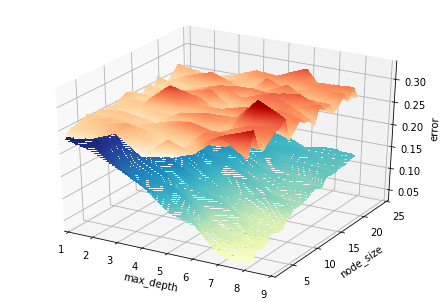

In [339]:
# Plot all the things

test_info = np.vstack([[[i,j, test_error[i,j]] for j in range(2,25)] for i in range(1,9)])
train_info = np.vstack([[[i,j, train_error[i,j]] for j in range(2,25)] for i in range(1,9)])
 
fig = plt.figure()
ax = Axes3D(fig)

plt.tricontourf(train_info[:,0], train_info[:,1], train_info[:,2], 70, cmap = 'YlGnBu')
plt.tricontourf(test_info[:,0], test_info[:,1], test_info[:,2], 70, cmap = 'OrRd')    
    
ax.set_xlim(1,9)
ax.set_ylim(2,25)

ax.set_xlabel('max_depth')
ax.set_ylabel('node_size')
ax.set_zlabel('error')

plt.show()

In [311]:
# Make a random forest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

#import data
data = loadmat('Pima-Data-Adjusted.mat')['data']
print(data.shape)

labels = data[:,8]
data = data[:,0:8]

def cross_validation_forest(num, num_trees, max_depth, min_samples_split):
    testing_accuracy = np.zeros(num)
    training_accuracy = np.zeros(num)
    for k in range(num):
        x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.3)

        model = RandomForestClassifier(n_estimators= num_trees,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split)

        model.fit(x_train, y_train)

        test_predictions = model.predict(x_val)
        testing_accuracy[k] = accuracy_score(y_val, test_predictions)
        
        train_predictions = model.predict(x_train)
        training_accuracy[k] = accuracy_score(y_train, train_predictions)
    return 1-np.mean(testing_accuracy), 1-np.mean(training_accuracy)

#test it's working
print(cross_validation_forest(5,10,4,13))


(537, 9)
(0.23456790123456783, 0.15093333333333336)


Text(0.5, 1.0, 'Tuning hyperparameter: number of trees')

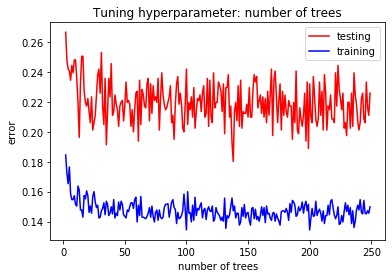

In [328]:
#Tune hyperparameters (i.e. number of trees)
max_depth = 4
node_size = 15
max_number_of_trees = 250

num_trees = np.linspace(2,max_number_of_trees-1, (max_number_of_trees - 2))

testing_error = np.zeros(max_number_of_trees)
train_error = np.zeros(max_number_of_trees)
for i in range(2,max_number_of_trees):
    testing_error[i], train_error[i] = cross_validation_forest(5, i, max_depth, node_size)
    
fig = plt.figure()
plt.plot(num_trees, testing_error[2:max_number_of_trees],'-',color='r', label = 'testing')
plt.plot(num_trees, train_error[2:max_number_of_trees],'-',color='b', label = 'training')
plt.legend()

plt.xlabel('number of trees')
plt.ylabel('error')
plt.title('Tuning hyperparameter: number of trees')

In [329]:
idx = np.argpartition(testing_error, 8)
print(idx[:8])
print(testing_error[idx[:8]])

[  1 137   0  61 197  35 138 199]
[0.         0.19259259 0.         0.19382716 0.19382716 0.19135802
 0.18024691 0.18888889]
